In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [20]:
img = cv2.imread("../DATA/pennies.jpg")

In [21]:
def display(img, cmap = "gray"):
    plt.figure(figsize=(7,7))
    plt.imshow(img, cmap)
    plt.show()

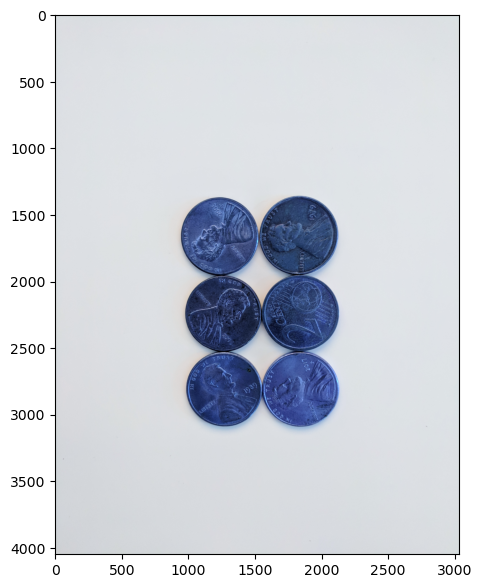

In [22]:
display(img)

In [23]:
img = cv2.medianBlur(img, 35)

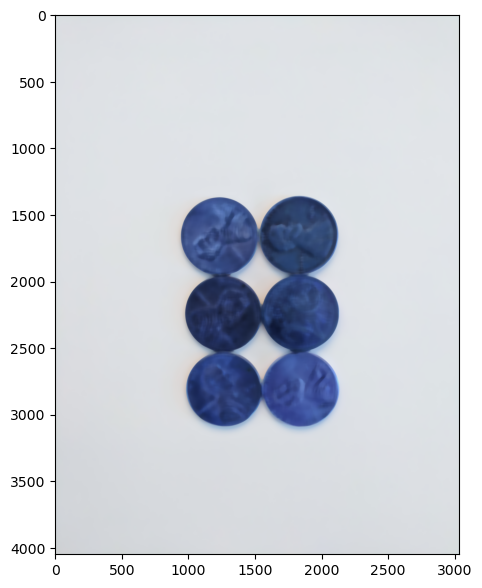

In [24]:
display(img)

In [25]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [26]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

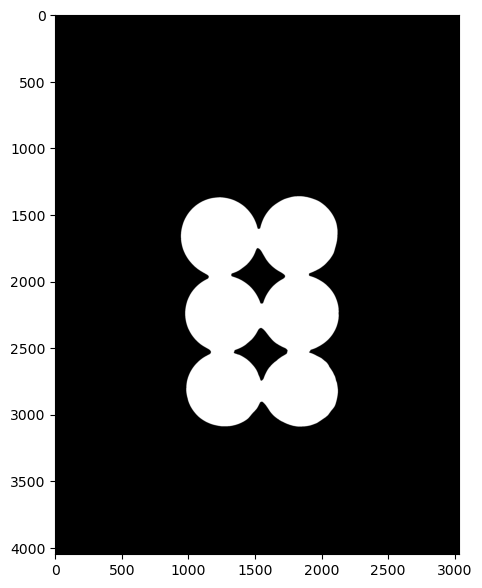

In [27]:
display(thresh)

In [28]:
# GÜRÜLTÜ GİDERME 

In [29]:
kernel = np.ones((3,3), np.uint8)

In [30]:
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

In [31]:
sure_bg = cv2.dilate(opening, kernel, iterations = 3)

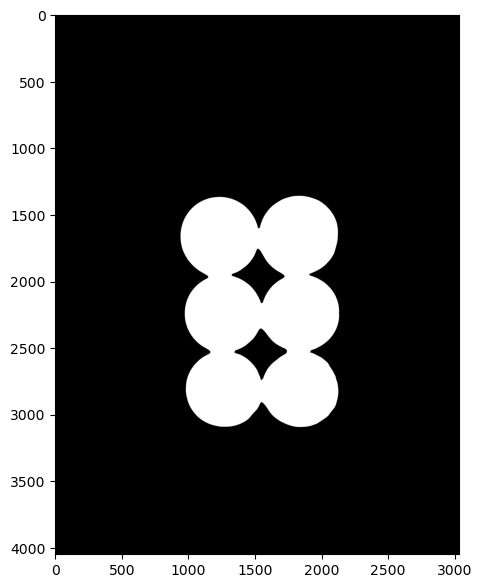

In [32]:
display(sure_bg)

In [33]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

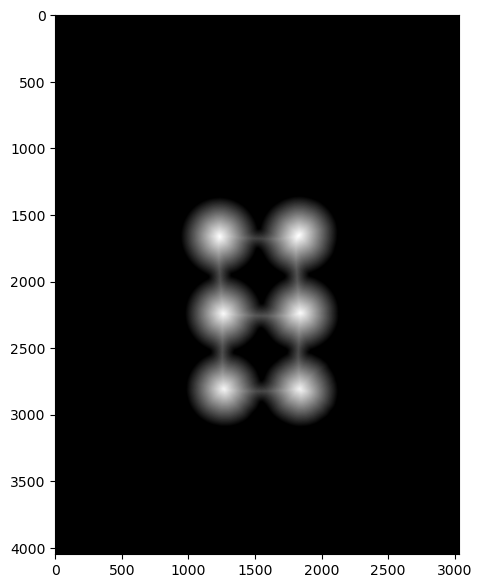

In [34]:
display(dist_transform)

In [35]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

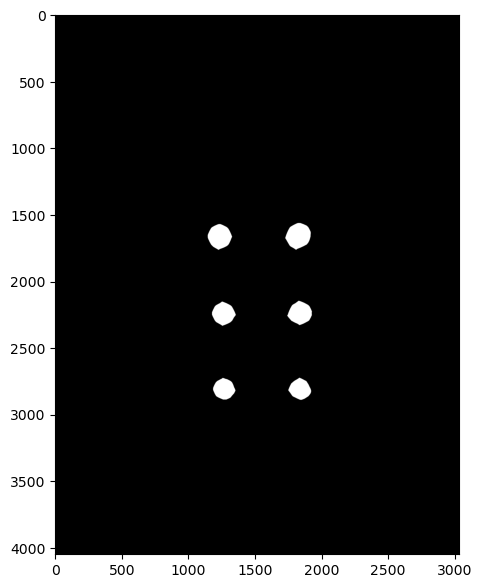

In [36]:
display(sure_fg)

In [37]:
sure_fg = np.uint8(sure_fg)

In [38]:
unknown = cv2.subtract(sure_bg, sure_fg)

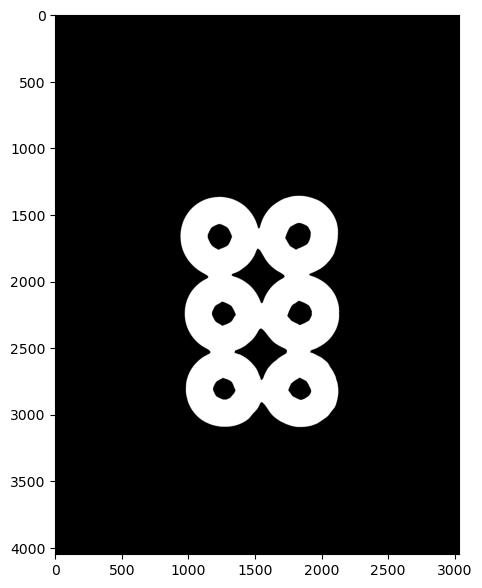

In [39]:
display(unknown)

In [40]:
ret, markers = cv2.connectedComponents(sure_fg)

In [41]:
markers = markers + 1

In [42]:
markers[unknown == 255] = 0

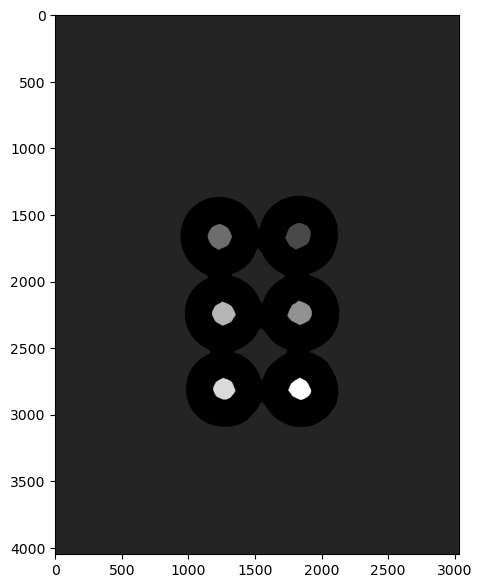

In [43]:
display(markers)

In [44]:
markers = cv2.watershed(img, markers)

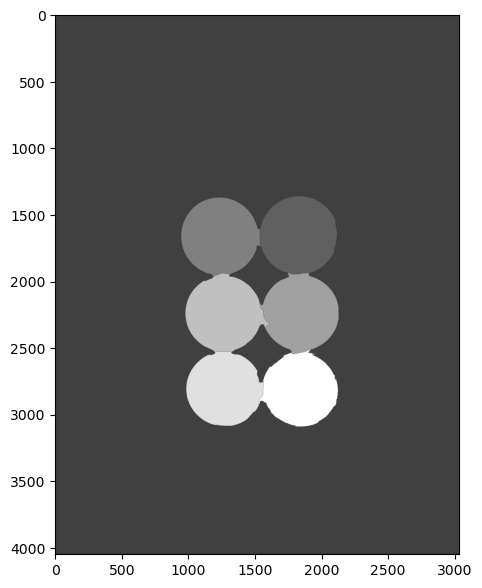

In [45]:
display(markers)

In [46]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [47]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(img, contours, i, (255,0,0), 10)

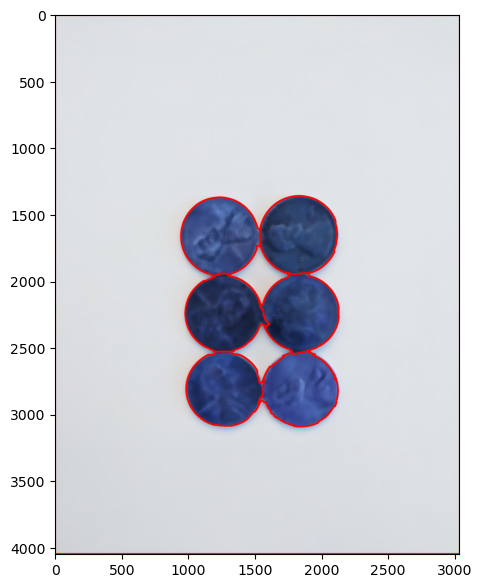

In [48]:
display(img)